In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('/workspaces/EDA_3/data/raw/medical_insurance_cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,21.736173,0.505232,221.718236,1.162182,0.795217,1.484305,667.646487
std,14.298189,0.500160,149.169320,1.287941,0.403694,1.104885,386.175105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,95.250000,0.000000,1.000000,1.000000,333.250000
50%,22.000000,1.000000,203.000000,1.000000,1.000000,1.000000,667.500000
75%,34.000000,1.000000,333.000000,2.000000,1.000000,2.000000,1001.750000
max,46.000000,1.000000,547.000000,5.000000,1.000000,3.000000,1336.000000


In [7]:
modes =[] 

def get_mode(column):
    modes.append(df[column].mode())

for i in df.columns:
    get_mode(i)

modes

[0    18
 Name: age, dtype: int64,
 0    male
 Name: sex, dtype: object,
 0    32.3
 Name: bmi, dtype: float64,
 0    0
 Name: children, dtype: int64,
 0    no
 Name: smoker, dtype: object,
 0    southeast
 Name: region, dtype: object,
 0    1639.5631
 Name: charges, dtype: float64]

In [8]:
num_list = [
    "sex",
    "smoker",
    "region"
    ]

In [10]:
# Creamos una función que factoriza los valores insertados
def factor(column):
    df[column] = pd.factorize(df[column])[0]

# Creamos otra función que nos almacenará el nombre de las etiquetas en una lista
tag_list = []
def tags (column):
    tag_string = pd.factorize(df[column])[1]
    tag_list.append(tag_string)



# Crear un nuevo DataFrame con solo las columnas no numéricas
df_no_numericas = df[num_list]

# Iteramos sobre esta lista para pasar cada elemento a la función
for i in df_no_numericas:
    tags(i)   

for i in df_no_numericas:
    factor(i)


df.head()

,age,sex,bmi,children,smoker,region,charges
0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1
2,2,1,2,2,1,1,2
3,3,1,3,0,1,2,3
4,4,1,4,0,1,2,4


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

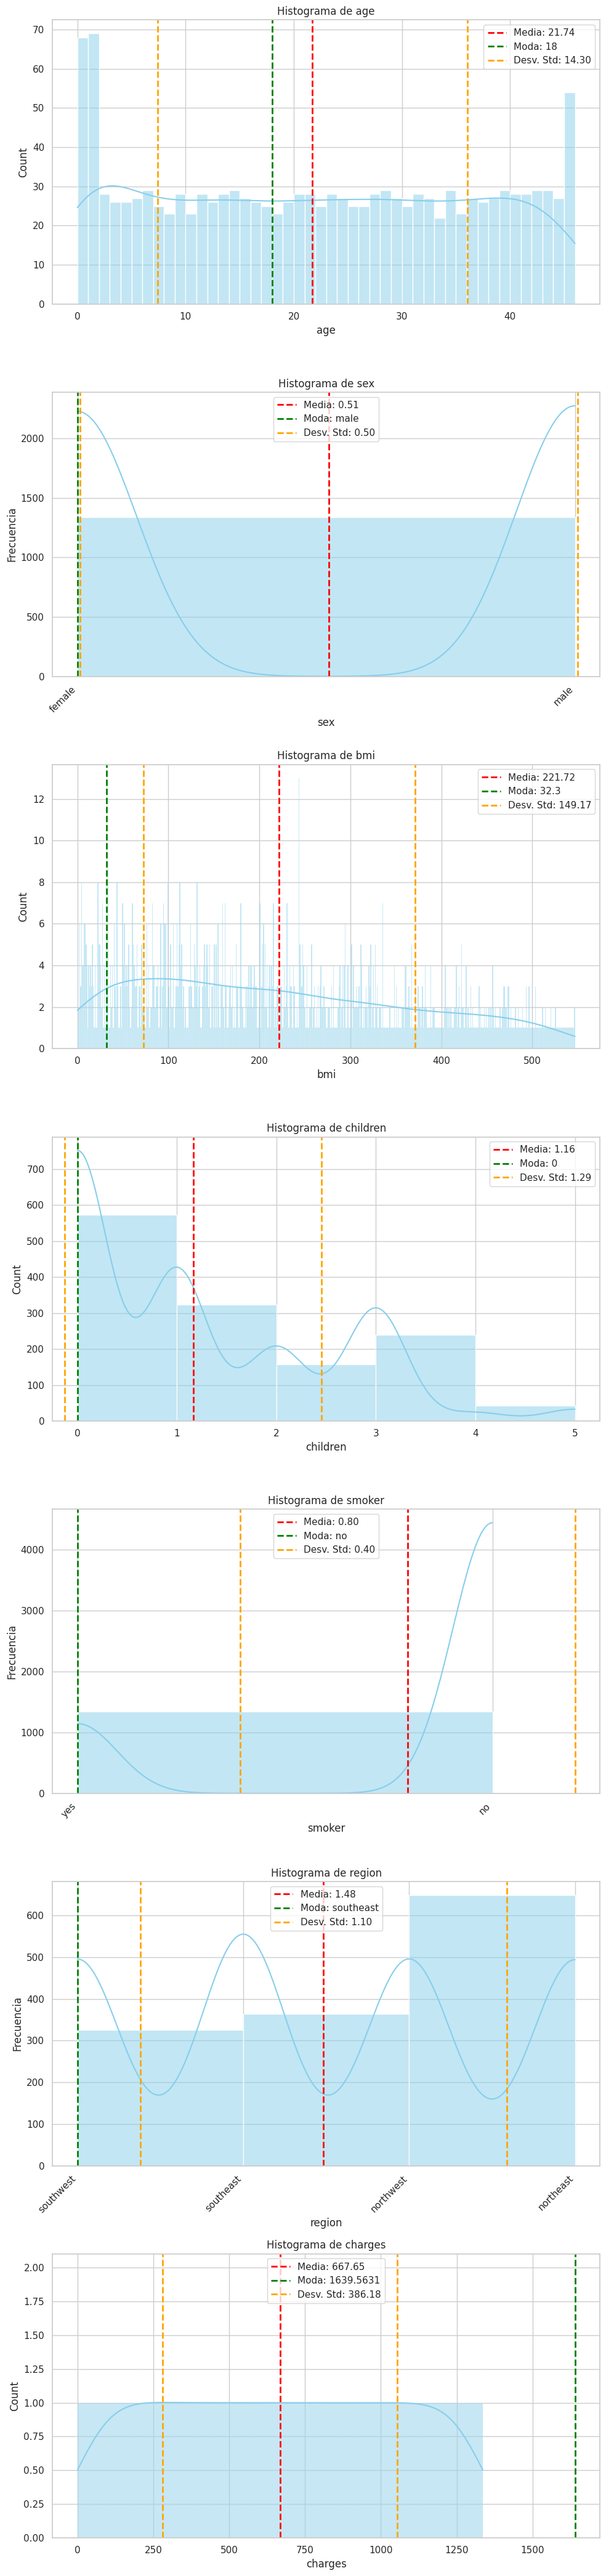

In [13]:
# Lista de nombres de columnas
columnas = df.columns

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Crear subgráficos para cada columna
fig, axes = plt.subplots(nrows=len(columnas), ncols=1, figsize=(10, 6 * len(columnas)))

# Iterar sobre cada columna
for i, col in enumerate(columnas):
    # Calcular la media, moda y desviación estándar
    media = df[col].mean()
    moda = modes[i].iloc[0]  # Puede haber múltiples modas, tomamos la primera
    desviacion = df[col].std()

    # Convertir los valores de los bins a enteros
    bins = range(int(min(df[col])), int(max(df[col])) + 1)

    # Graficar el histograma
    sns.histplot(df[col], bins=bins, kde=True, color='skyblue', ax=axes[i])

    # Línea vertical para la media
    axes[i].axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media:.2f}')

    # Línea vertical para la moda
    axes[i].axvline(moda, color='green', linestyle='dashed', linewidth=2, label=f'Moda: {moda}')

    # Líneas verticales para la desviación estándar
    axes[i].axvline(media + desviacion, color='orange', linestyle='dashed', linewidth=2, label=f'Desv. Std: {desviacion:.2f}')
    axes[i].axvline(media - desviacion, color='orange', linestyle='dashed', linewidth=2)

    axes[i].legend()
    axes[i].set_title(f'Histograma de {col}')

    # Verificar si la columna ha sido factorizada antes de configurar los xticks
    if col in num_list:
        # Obtener las etiquetas factorizadas de la columna
        etiquetas = tag_list[num_list.index(col)]
        
        # Establecer los ticks y etiquetas en el eje x
        axes[i].set_xticks(range(len(etiquetas)))
        axes[i].set_xticklabels(etiquetas, rotation=45, ha="right")

        axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()